#### Checkpoint 1 : Data Cleaning 1

- Load the companies and rounds data into two data frames and name them **companies** and **rounds2** respectively.
- Fill out the spreadsheet.

#### Checkpoint 2: Funding Type Analysis

- Find suitable investmenet type and help Spark Fund to make right choice

#### Checkpoint 3: Country Analysis

- Find top nine countries which have received the highest total funding 

####  Checkpoint 4: Sector Analysis 1

- Extract the primary sector of each category list from the category_list column
- Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’     is also considered one of the main sectors)

#### Checkpoint 5: Sector Analysis 2

- Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:
1. All the columns of the master_frame along with the primary sector and the main sector
2. The total number (or count) of investments for each main sector in a separate column
3. The total amount invested in each main sector in a separate column

#### Checkpoint 6: Plots

In [1]:
# Loading libraries and reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# Reading delimited file using pd.read_csv(filepath, sep, header)
# Using encoding = "ISO-8859-1"
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
mapping_df = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [2]:
# unique companies present in the companies
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [46]:
print("Companies DataSet")
print(companies.isnull().sum())
print("\n Rounds2 DataSet")
print(rounds2.isnull().sum())
print("\n Mapping DataSet")
print(mapping_df.isnull().sum())

Companies DataSet
permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

 Rounds2 DataSet
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

 Mapping DataSet
category_list                              0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
main_sector                                0
dtype: int64


In [4]:
# useful for debug and present state of the data
print(companies.head())
print(companies.info())
print(rounds2.head())
print(rounds2.info())


                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        C

In [5]:
# unique companies present in rounds2
rounds2.nunique()

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [6]:
# Merging the dataframes
# company_permalink,permalink is the common column/key, which has to be provided to the 'on' argument
# how = 'inner' makes sure that all the comapnies ids are reflectd in the master_frame

companies['permalink'] = companies['permalink'].astype(str).str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].astype(str).str.lower()

master_frame = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')

In [7]:
# check the shape, it gives number of the observations
master_frame.shape

(114875, 16)

In [8]:
# isnull()
master_frame.isnull().head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
dtype: int64

In [10]:
# raised_amount_usd has considerable number of missing value.
# So, it will not help in finding average for funding_round_type
# Let's remove such rows from master_frame

# removing NaN Price rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [11]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                4330
category_list               1038
status                         0
country_code                5830
state_code                  7581
region                      7027
city                        7024
founded_at                 15944
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66750
funded_at                      0
raised_amount_usd              0
dtype: int64

In [14]:
#  Grouping: First, we will group the master_frame by funding_round_type
df_by_funding_round_type = master_frame.groupby('funding_round_type')

# Mean : Let's find the mean for raised_amount_usd 
# Not filterig for required 4 funding_round_type as the values are visible without filters
# Removed scientific notation
#funding_raised_df = pd.DataFrame(df_by_funding_round_type.raised_amount_usd.mean().apply(lambda x: format(x, 'f')))
# Avaerage in million USD
#pd.options.display.float_format = '{:.4f}'.format
funding_raised_df = pd.DataFrame(df_by_funding_round_type.raised_amount_usd.mean().apply(lambda x: '%.4f' % x))
funding_raised_df

,raised_amount_usd
funding_round_type,
angel,958891.7726
convertible_note,1457326.6902
debt_financing,17043526.0230
equity_crowdfunding,539113.3363
grant,4312659.9160
non_equity_assistance,411203.0548
post_ipo_debt,168704571.8224
post_ipo_equity,82182493.8710
private_equity,73341461.7401


In [16]:
# Let's see total amount of investment done in each funding_round_type (in million USD)

df_by_funding_round_type.raised_amount_usd.sum()/1000000

funding_round_type
angel                      4659.255123
convertible_note           2102.922414
debt_financing           113884.840886
equity_crowdfunding         660.413837
grant                      9134.213702
non_equity_assistance        30.017823
post_ipo_debt             25643.094917
post_ipo_equity           51610.606151
private_equity           141915.728467
product_crowdfunding        526.168593
secondary_market           2389.488903
seed                      16977.944058
undisclosed               30438.620425
venture                  590044.672396
Name: raised_amount_usd, dtype: float64

In [17]:
# Let's see how many compaines are investing each funding_round_type

df_by_funding_round_type.company_permalink.count()

funding_round_type
angel                     4859
convertible_note          1443
debt_financing            6682
equity_crowdfunding       1225
grant                     2118
non_equity_assistance       73
post_ipo_debt              152
post_ipo_equity            628
private_equity            1935
product_crowdfunding       386
secondary_market            30
seed                     23584
undisclosed               1581
venture                  50219
Name: company_permalink, dtype: int64

In [18]:
# raised_amount_usd has considerable number of missing value.
# So, it will not help in finding average for funding_round_type
# Let's remove such rows from master_frame

# removing NaN Price rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [19]:
#  Grouping: First, we will group the master_frame by funding_round_type
df_by_funding_round_type = master_frame.groupby('funding_round_type')

# Mean : Let's find the mean for raised_amount_usd 
# Not filterig for required 4 funding_round_type as the values are visible without filters
# Removed scientific notation
#funding_raised_df = pd.DataFrame(df_by_funding_round_type.raised_amount_usd.mean().apply(lambda x: format(x, 'f')))
# Avaerage in million USD
funding_raised_df = pd.DataFrame(df_by_funding_round_type.raised_amount_usd.mean()/1000000)
funding_raised_df

,raised_amount_usd
funding_round_type,
angel,0.958892
convertible_note,1.457327
debt_financing,17.043526
equity_crowdfunding,0.539113
grant,4.312660
non_equity_assistance,0.411203
post_ipo_debt,168.704572
post_ipo_equity,82.182494
private_equity,73.341462


In [20]:
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]
print(master_frame.isnull().sum())

permalink                      0
name                           1
homepage_url                3378
category_list                578
status                         0
country_code                   0
state_code                  1751
region                      1197
city                        1194
founded_at                 13647
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         62149
funded_at                      0
raised_amount_usd              0
dtype: int64


In [21]:
# Let's find top 9 countries by 'Venture' funding_round_type

master_frame_venture_df = master_frame[master_frame['funding_round_type'] == 'venture']
df_by_country_funding_round_type = master_frame_venture_df.groupby(['country_code', 'funding_round_type'])
#df_by_country_funding_round_type
top9 = pd.DataFrame(df_by_country_funding_round_type.raised_amount_usd.sum()/1000000).sort_values('raised_amount_usd', ascending = False).head(9)
top9

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,422510.842796
CHN,venture,39835.418773
GBR,venture,20245.627416
IND,venture,14391.858718
CAN,venture,9583.332317
FRA,venture,7241.142340
ISR,venture,6907.514579
DEU,venture,6345.559822
JPN,venture,3363.676611


In [22]:
# cols having at least one missing value
master_frame['category_list'].isnull().any(axis=0)

True

In [23]:
# remove Nan rows for category list
master_frame['category_list'].isnull().any(axis=0)
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]
print(master_frame.info())
print(master_frame.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88507 entries, 0 to 114874
Data columns (total 16 columns):
permalink                  88507 non-null object
name                       88506 non-null object
homepage_url               85256 non-null object
category_list              88507 non-null object
status                     88507 non-null object
country_code               88507 non-null object
state_code                 86777 non-null object
region                     87323 non-null object
city                       87326 non-null object
founded_at                 75148 non-null object
company_permalink          88507 non-null object
funding_round_permalink    88507 non-null object
funding_round_type         88507 non-null object
funding_round_code         26775 non-null object
funded_at                  88507 non-null object
raised_amount_usd          88507 non-null float64
dtypes: float64(1), object(15)
memory usage: 11.5+ MB
None
permalink                      0
name         

In [24]:
# remove Nan rows for mapping_df.category_list
mapping_df['category_list'].isnull().any(axis=0)
mapping_df = mapping_df[~pd.isnull(mapping_df['category_list'])]
mapping_df.drop('Blanks', axis=1, inplace=True)
print(mapping_df.info())
print(mapping_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 9 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(8), object(1)
memory usage: 53.7+ KB
None
category_list                              0
Automotive & Sports                        0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Searc

In [25]:
mapping_df.nunique()

category_list                              687
Automotive & Sports                          2
Cleantech / Semiconductors                   2
Entertainment                                2
Health                                       2
Manufacturing                                2
News, Search and Messaging                   2
Others                                       2
Social, Finance, Analytics, Advertising      2
dtype: int64

In [26]:
# Creating new column primary_sector by spliting '|' the category_list
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x : x.split('|')[0])

In [27]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,Application Platforms
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,Games
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Biotechnology


In [28]:
# Step1: creating a series of main sector from mapping.csv
# Step2: Assigning the created series to mapping_df 
# Step3: Merge master_frame and mapping_df

mapping_df.set_index('category_list',inplace=True)
mapping_df_with_main_sector = mapping_df.idxmax(axis=1)

mapping_df = mapping_df.assign(main_sector=mapping_df_with_main_sector.values)
mapping_df = mapping_df.reset_index(drop=False)


master_primary_main_sector_df = pd.merge(master_frame, mapping_df, how='inner', on='category_list')


In [29]:
master_primary_main_sector_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39754 entries, 0 to 39753
Data columns (total 26 columns):
permalink                                  39754 non-null object
name                                       39753 non-null object
homepage_url                               37846 non-null object
category_list                              39754 non-null object
status                                     39754 non-null object
country_code                               39754 non-null object
state_code                                 39108 non-null object
region                                     39130 non-null object
city                                       39133 non-null object
founded_at                                 31573 non-null object
company_permalink                          39754 non-null object
funding_round_permalink                    39754 non-null object
funding_round_type                         39754 non-null object
funding_round_code                         122

In [30]:
# merged data frame
master_primary_main_sector_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,primary_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,Media,0,0,1,0,0,0,0,0,Entertainment
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,Media,0,0,1,0,0,0,0,0,Entertainment
2,/organization/anthill-magazine,Anthill Magazine,http://anthillonline.com/,Media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,...,Media,0,0,1,0,0,0,0,0,Entertainment
3,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,...,Media,0,0,1,0,0,0,0,0,Entertainment
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,...,Media,0,0,1,0,0,0,0,0,Entertainment


In [31]:
master_primary_main_sector_df.shape

(39754, 26)

In [53]:
# group by main_sector and count # of investment for each sector
master_primary_main_sector_df.loc[:,'total_no_of_investment'] = master_primary_main_sector_df.groupby(master_primary_main_sector_df['main_sector'])['funding_round_permalink'].transform('count')

# group by main_sector and count sum of amount invested **(in million USD)** for each sector
master_primary_main_sector_df.loc[:,'total_amount_invested_million_usd'] = master_primary_main_sector_df.groupby(master_primary_main_sector_df['main_sector'])['raised_amount_usd'].transform('sum')/1000000
    
print(master_primary_main_sector_df.info())
master_primary_main_sector_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8014 entries, 0 to 39752
Data columns (total 28 columns):
permalink                                  8014 non-null object
name                                       8014 non-null object
homepage_url                               7546 non-null object
category_list                              8014 non-null object
status                                     8014 non-null object
country_code                               8014 non-null object
state_code                                 7902 non-null object
region                                     7900 non-null object
city                                       7900 non-null object
founded_at                                 6390 non-null object
company_permalink                          8014 non-null object
funding_round_permalink                    8014 non-null object
funding_round_type                         8014 non-null object
funding_round_code                         5126 non-null obj

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector,total_no_of_investment,total_amount_invested_million_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,0,1,0,0,0,0,0,Entertainment,371,3249.787348
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,0,1,0,0,0,0,0,Entertainment,371,3249.787348
3,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,...,0,1,0,0,0,0,0,Entertainment,371,3249.787348
41,/organization/51hejia-com,51hejia.com,http://51hejia.com,Curated Web,operating,CHN,23,Shanghai,Shanghai,NaN,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
42,/organization/591wed,591wed,http://591wed.com,Curated Web,operating,CHN,22,Beijing,Beijing,NaN,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
53,/organization/aeropost,Aeropost,http://aeropost.com,Curated Web,operating,USA,FL,Miami,Miami,01-01-1986,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
57,/organization/akonix-systems,Akonix Systems,http://www.akonix.com,Curated Web,operating,USA,CA,San Diego,San Diego,01-01-2000,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
60,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,Curated Web,acquired,USA,CA,SF Bay Area,Oakland,NaN,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
61,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,Curated Web,acquired,USA,CA,SF Bay Area,Oakland,NaN,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215
80,/organization/associatedcontent,Associated Content,http://www.associatedcontent.com,Curated Web,acquired,USA,CO,Denver,Denver,NaN,...,0,0,0,0,1,0,0,"News, Search and Messaging",766,6602.131215


In [51]:
# Filter to 'venture' funding_round_type 
master_primary_main_sector_df = master_primary_main_sector_df[(master_primary_main_sector_df['funding_round_type'] == 'venture') & (master_primary_main_sector_df['raised_amount_usd'].between(5000000, 15000000))]

# Create three separate data frames D1, D2 and D3

D1 = master_primary_main_sector_df[master_primary_main_sector_df['country_code'] == 'USA']
D2 = master_primary_main_sector_df[master_primary_main_sector_df['country_code'] == 'GBR']
D3 = master_primary_main_sector_df[master_primary_main_sector_df['country_code'] == 'IND']

print(D1.shape)
print(D1.head())

(5949, 28)
                        permalink             name               homepage_url  \
1   /organization/all-def-digital  All Def Digital   http://alldefdigital.com   
53         /organization/aeropost         Aeropost        http://aeropost.com   
57   /organization/akonix-systems   Akonix Systems      http://www.akonix.com   
60       /organization/amberpoint       AmberPoint  http://www.amberpoint.com   
61       /organization/amberpoint       AmberPoint  http://www.amberpoint.com   

   category_list     status country_code state_code       region         city  \
1          Media  operating          USA         CA  Los Angeles  Los Angeles   
53   Curated Web  operating          USA         FL        Miami        Miami   
57   Curated Web  operating          USA         CA    San Diego    San Diego   
60   Curated Web   acquired          USA         CA  SF Bay Area      Oakland   
61   Curated Web   acquired          USA         CA  SF Bay Area      Oakland   

    founded_at 

In [52]:
# Total number of investments 
print(D1['funding_round_permalink'].shape)
print(D2['funding_round_permalink'].shape)
print(D3['funding_round_permalink'].shape)

(5949,)
(337,)
(173,)


In [35]:
# Total amount of investment (USD)

print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())

53272315512.0
2971451457.0
1517298277.0


In [36]:
# Top Sector name (no. of investment-wise)
# Second Sector name (no. of investment-wise)
# Third Sector name (no. of investment-wise)
# Number of investments in top sector (3)
# Number of investments in second sector (4)
# Number of investments in third sector (5)

print(D1.groupby('main_sector')['total_no_of_investment'].count().sort_values(ascending=False).head(3))
print(D2.groupby('main_sector')['total_no_of_investment'].count().sort_values(ascending=False).head(3))
print(D3.groupby('main_sector')['total_no_of_investment'].count().sort_values(ascending=False).head(3))

main_sector
Others                        2069
Cleantech / Semiconductors    1737
Health                         601
Name: total_no_of_investment, dtype: int64
main_sector
Cleantech / Semiconductors    107
Others                        106
News, Search and Messaging     31
Name: total_no_of_investment, dtype: int64
main_sector
Others                        74
News, Search and Messaging    31
Entertainment                 19
Name: total_no_of_investment, dtype: int64


In [37]:
# For point 3 (top sector count-wise), which company received the highest investment?
# For point 4 (second best sector count-wise), which company received the highest investment?
#D1 = D1[D1['main_sector'] == 'Others'] -- Can be used for filtering the data even further


print(D1.groupby(['name','main_sector'])['total_no_of_investment'].count().sort_values(ascending=False))
print(D2.groupby(['name','main_sector'])['total_no_of_investment'].count().sort_values(ascending=False))
print(D3.groupby(['name','main_sector'])['total_no_of_investment'].count().sort_values(ascending=False))

name                       main_sector                            
Tigo Energy                Cleantech / Semiconductors                 8
ForSight Labs              Cleantech / Semiconductors                 7
EndoGastric Solutions      Health                                     7
YuMe                       Social, Finance, Analytics, Advertising    6
Virtustream                Others                                     6
ChoiceStream               Social, Finance, Analytics, Advertising    6
SCIenergy                  Cleantech / Semiconductors                 6
Capella Photonics          Others                                     6
Bit9                       Others                                     5
Ocular Therapeutix         Cleantech / Semiconductors                 5
Visible Measures           Social, Finance, Analytics, Advertising    5
Carbon Design Systems      Others                                     5
Sebacia                    News, Search and Messaging                

Text(0.5,1,'average amount of investment')

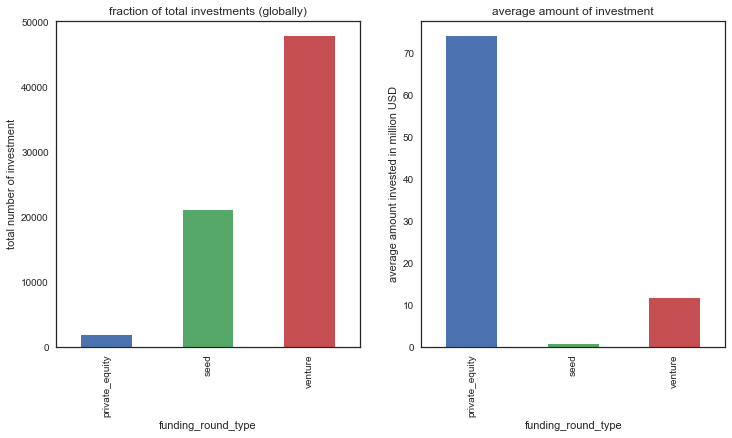

In [38]:
# A plot showing the fraction of total investments (globally) in venture, seed, and private equity,
# and the average amount of investment in each funding type.
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

# 'funding_type_list' all required funding type to be considered
funding_type_list = ['venture', 'seed', 'private_equity']

master_primary_main_sector_df_plot1 = master_frame[(master_frame['funding_round_type'].isin(funding_type_list) )]
master_primary_main_sector_df_total_investment = master_primary_main_sector_df_plot1.groupby(master_primary_main_sector_df_plot1['funding_round_type'])['funding_round_permalink'].count()
master_primary_main_sector_df_average_investment_amount = master_primary_main_sector_df_plot1.groupby(master_primary_main_sector_df_plot1['funding_round_type'])['raised_amount_usd'].mean()/1000000


# adjust figure size
plt.figure(figsize=(12, 6))

# subplot 1: total_no_of_investment
plt.subplot(1, 2, 1)
master_primary_main_sector_df_total_investment.plot.bar()
#sns.barplot(x='funding_round_type', y='total_no_of_investment', data=master_primary_main_sector_df)
plt.ylabel('total number of investment')
plt.title("fraction of total investments (globally)")

# subplot 2: total_amount_invested_million_usd
plt.subplot(1, 2, 2)
master_primary_main_sector_df_average_investment_amount.plot.bar()
#sns.barplot(x='funding_round_type', y='total_amount_invested_million_usd', data=master_primary_main_sector_df)
plt.ylabel('average amount invested in million USD')
plt.title("average amount of investment")



Text(0.5,1,'top 9 countries against the total amount of investments')

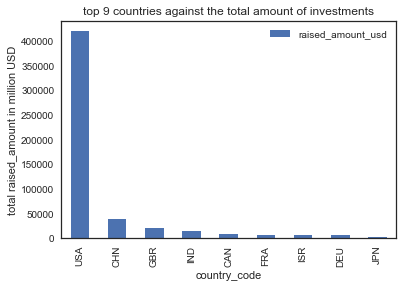

In [39]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
master_frame_venture_df = master_frame[master_frame['funding_round_type'] == 'venture']

master_frame_venture_df = master_frame_venture_df.groupby(master_frame_venture_df['country_code'])['raised_amount_usd'].sum().reset_index()
master_frame_venture_df['raised_amount_usd'] = master_frame_venture_df['raised_amount_usd']/1000000
master_frame_venture_df = master_frame_venture_df.sort_values('raised_amount_usd', ascending = False).head(9)
master_frame_venture_df.set_index('country_code', inplace=True)
master_frame_venture_df.plot.bar()

plt.ylabel('total raised_amount in million USD')
plt.title("top 9 countries against the total amount of investments")



### please note that in the above graph CHN (China), DEU (Germany) and JPN (Japan) is a non-english speaking country

Text(0.5,0,'IND')

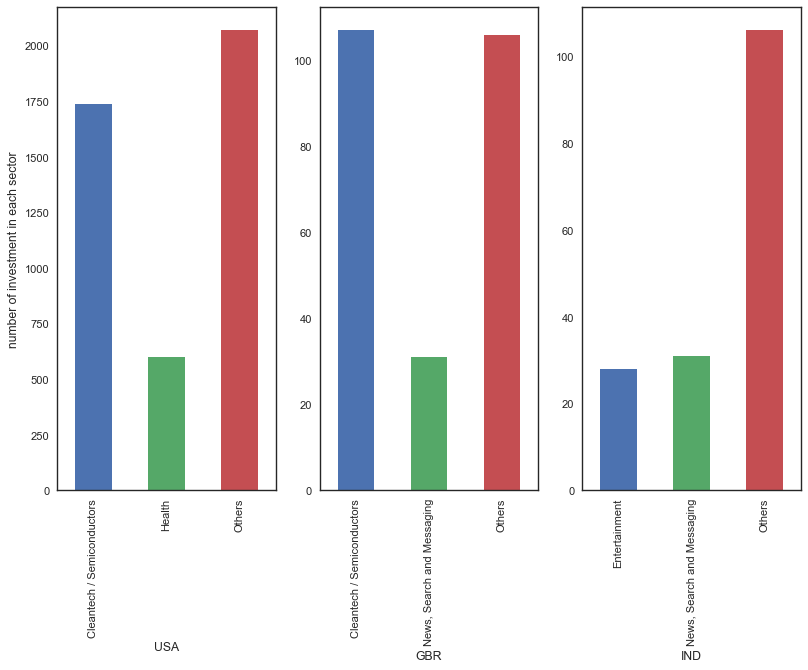

In [37]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
# (for the chosen investment type FT). 
master_primary_main_sector_df = master_primary_main_sector_df[(master_primary_main_sector_df['funding_round_type'] == 'venture')]
master_primary_main_sector_df_subplot1 = master_primary_main_sector_df[(master_primary_main_sector_df['country_code'] == 'USA')]
master_primary_main_sector_df_subplot1 = master_primary_main_sector_df_subplot1[((master_primary_main_sector_df_subplot1['main_sector'] == 'Others') | (master_primary_main_sector_df_subplot1['main_sector'] == 'Cleantech / Semiconductors') | (master_primary_main_sector_df_subplot1['main_sector'] == 'Health'))]

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
master_primary_main_sector_df_subplot1 = master_primary_main_sector_df_subplot1.groupby(['main_sector'])['funding_round_permalink'].count()
master_primary_main_sector_df_subplot1.plot.bar()
plt.xlabel('USA')
plt.ylabel('number of investment in each sector')

master_primary_main_sector_df_subplot2 = master_primary_main_sector_df[(master_primary_main_sector_df['country_code'] == 'GBR')]
master_primary_main_sector_df_subplot2 = master_primary_main_sector_df_subplot2[((master_primary_main_sector_df_subplot2['main_sector'] == 'Others') | (master_primary_main_sector_df_subplot2['main_sector'] == 'Cleantech / Semiconductors') | (master_primary_main_sector_df_subplot2['main_sector'] == 'News, Search and Messaging'))]

plt.subplot(1, 3, 2)
master_primary_main_sector_df_subplot2 = master_primary_main_sector_df_subplot2.groupby(['main_sector'])['funding_round_permalink'].count()
master_primary_main_sector_df_subplot2.plot.bar()
plt.xlabel('GBR')

master_primary_main_sector_df_subplot3 = master_primary_main_sector_df[(master_primary_main_sector_df['country_code'] == 'GBR')]
master_primary_main_sector_df_subplot3 = master_primary_main_sector_df_subplot3[((master_primary_main_sector_df_subplot3['main_sector'] == 'Others') | (master_primary_main_sector_df_subplot3['main_sector'] == 'Entertainment') | (master_primary_main_sector_df_subplot3['main_sector'] == 'News, Search and Messaging'))]


plt.subplot(1, 3, 3)
master_primary_main_sector_df_subplot3 = master_primary_main_sector_df_subplot3.groupby(['main_sector'])['funding_round_permalink'].count()
master_primary_main_sector_df_subplot3.plot.bar()
plt.xlabel('IND')
